In [1]:
import seaborn as sns
import os 
import pandas as pd

In [2]:
result_path_folder_name = 'result_BE_N_q_swap'

In [3]:
list_of_results = []
# loop through all dirs in results
base_path = "../results/"
for net_dir in os.listdir(base_path):

    if net_dir in ['github','nodes_mapping', 'remapped_nets'] : continue
    path = os.path.join(base_path, net_dir)

    if net_dir == '.DS_Store': continue

    # loop through all files in dir
    for dim_dir in os.listdir(path):

        dim_path = os.path.join(path, dim_dir) 

        if dim_dir == '.DS_Store': continue
        # loop through all files in dir
        for result_file in os.listdir(os.path.join(dim_path, result_path_folder_name)):
            if result_file == '.DS_Store':
                continue
            result_path = os.path.join(dim_path, result_path_folder_name, result_file)
            
            # load results
            df = pd.read_csv(result_path, header=None)
            # add to list
            list_of_results.append([net_dir, dim_dir, df.values.T[0][1]])

In [4]:
df = pd.DataFrame(list_of_results, columns=['network', 'dimension', 'divergence_score'])


In [5]:
df[['network','dimension']].value_counts()

network      dimension
airports     dim_128      10
             dim_16       10
mouse_brain  dim_64       10
             dim_4        10
             dim_32       10
             dim_16       10
             dim_128      10
emails       dim_8        10
             dim_64       10
             dim_4        10
             dim_32       10
             dim_16       10
             dim_128      10
airports     dim_8        10
             dim_64       10
             dim_4        10
             dim_32       10
mouse_brain  dim_8        10
Name: count, dtype: int64

In [6]:
# convert to dataframe

# Extract the numeric part from the 'dimension' column
df['dimension_numeric'] = df['dimension'].str.extract(r'(\d+)').astype(int)



In [7]:

# Apply the custom sorting function and sort the DataFrame
df = df.sort_values(by=['dimension_numeric'])

# Drop the temporary 'dimension_numeric' column if you don't need it anymore
df = df.drop(columns=['dimension_numeric'])


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='dimension', ylabel='divergence_score'>

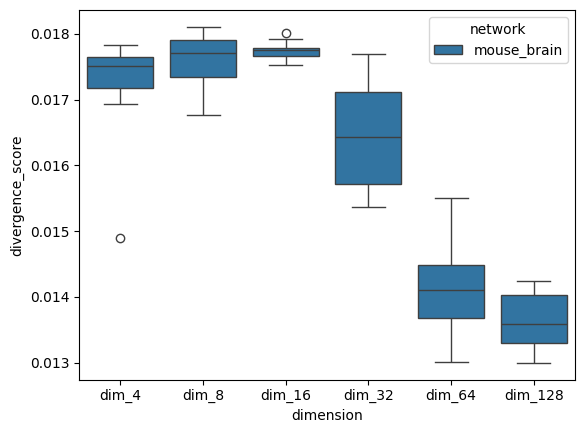

In [8]:
# box plot of mouse brain net, hue by dimension
sns.boxplot(x='dimension', y='divergence_score', hue='network', data=df[df['network'] == 'mouse_brain'])
# specify the order of the hue

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='dimension', ylabel='divergence_score'>

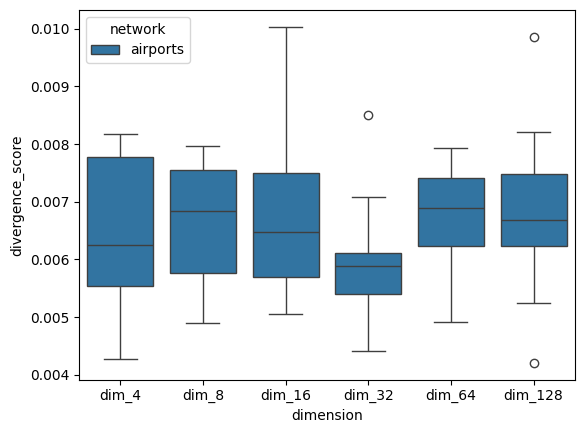

In [9]:
# airports
sns.boxplot(x='dimension', y='divergence_score', hue='network', data=df[df['network'] == 'airports'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='dimension', ylabel='divergence_score'>

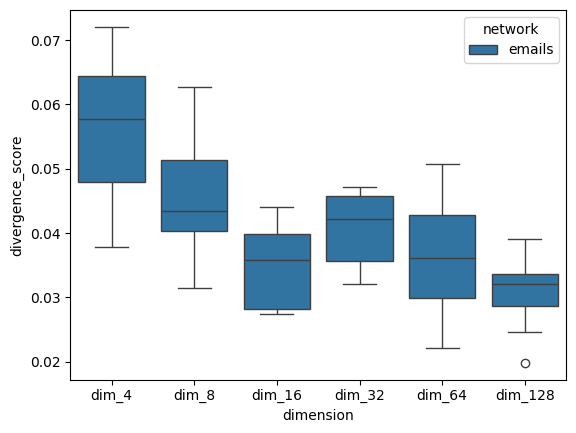

In [10]:
# emails 
sns.boxplot(x='dimension', y='divergence_score', hue='network', data=df[df['network'] == 'emails'])